In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [6]:
income_data = pd.read_csv("income_evaluation.csv")
income_data.head(8)

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   
5   37            Private   284582     Masters              14   
6   49            Private   160187         9th               5   
7   52   Self-emp-not-inc   209642     HS-grad               9   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   

       sex   capital-gain   capital-loss   hours-per-week  native-country  \
0     Male           2174              0               40   United-States   
1     Male              0              0               13   United-States   
2     Male              0              0               40   United-States   
3     Male              0              0               40   United-States   
4   Female              0              0               40            Cuba   
5   Female              0              0               40   United-States   
6   Female              0              0               16         Jamaica   
7     Male              0              0               45   United-States   

   income  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K  
5   <=50K  
6   <=50K  
7    >50K

In [7]:
income_data.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [12]:
# Siivotaan sarakkeiden nimiä
income_data.columns = income_data.columns.str.strip()

In [13]:
# Luodaan dummy-data sarakkeista
income_data_dummies = pd.get_dummies(
    income_data,
    columns=[
        'workclass',
        'education',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'native-country'
    ]
)
income_data_dummies.head(6)

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   
5   37  284582             14             0             0              40   

   income  workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  ...  \
0   <=50K         False                   False                 False  ...   
1   <=50K         False                   False                 False  ...   
2   <=50K         False                   False                 False  ...   
3   <=50K         False                   False                 False  ...   
4   <=50K         False                   False                 False  ...   
5   <=50K         False                   False                 False  ...   

   native-country_ Portugal  native-country_ Puerto-Rico  \
0                     False                        False   
1                     False                        False   
2                     False                        False   
3                     False                        False   
4                     False                        False   
5                     False                        False   

   native-country_ Scotland  native-country_ South  native-country_ Taiwan  \
0                     False                  False                   False   
1                     False                  False                   False   
2                     False                  False                   False   
3                     False                  False                   False   
4                     False                  False                   False   
5                     False                  False                   False   

   native-country_ Thailand  native-country_ Trinadad&Tobago  \
0                     False                            False   
1                     False                            False   
2                     False                            False   
3                     False                            False   
4                     False                            False   
5                     False                            False   

   native-country_ United-States  native-country_ Vietnam  \
0                           True                    False   
1                           True                    False   
2                           True                    False   
3                           True                    False   
4                          False                    False   
5                           True                    False   

   native-country_ Yugoslavia  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
5                       False  

[6 rows x 109 columns]

In [14]:
income_data_dummies.dtypes

age                                int64
fnlwgt                             int64
education-num                      int64
capital-gain                       int64
capital-loss                       int64
                                   ...  
native-country_ Thailand            bool
native-country_ Trinadad&Tobago     bool
native-country_ United-States       bool
native-country_ Vietnam             bool
native-country_ Yugoslavia          bool
Length: 109, dtype: object

In [16]:
Y = income_data_dummies["income"]
X = income_data_dummies.drop("income", axis=1)

In [17]:
# Erottellaan oppimista varten train-data
X_train_data, X_test, Y_train_data, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Validointi-dataa vielä erilleen
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size=0.20, random_state=0)

In [18]:
cv_params = {
    'n_estimators' : [50, 200], 
    'max_depth' : [10, 100],        
    'min_samples_leaf' : [0.4, 1], 
    'min_samples_split' : [0.001, 0.02],
    'max_features' : ["sqrt"], 
    'max_samples' : [.5, .9]
}

In [19]:
rfc = RandomForestClassifier(random_state=0)

In [20]:
rfc_val = GridSearchCV(rfc, cv_params, refit='f1', n_jobs=-1, verbose=1)

In [21]:
rfc_val.fit(X_train_data, Y_train_data)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 100], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.4, 1],
                         'min_samples_split': [0.001, 0.02],
                         'n_estimators': [50, 200]},
             refit='f1', verbose=1)

In [22]:
rfc_val.best_params_

{'max_depth': 100,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [23]:
# Luodaan RFC optimaaleilla parametreillä
rfc_fit = RandomForestClassifier(
    max_depth=100,
    max_features="sqrt",
    max_samples=0.9,
    min_samples_leaf=1,
    min_samples_split=0.001,
    n_estimators=50,
    random_state=0
)

In [24]:
rfc_fit.fit(X_train_data, Y_train_data)

RandomForestClassifier(max_depth=100, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

In [30]:
# Testataan mallin luotettavus
Y_pred = rfc_fit.predict(X_test)

print("The precision score is {}".format(precision_score(Y_test, Y_pred, pos_label=" <=50K")))
print("The recall score is {}".format(recall_score(Y_test, Y_pred, pos_label=" <=50K")))
print("The accuracy score is {}".format(accuracy_score(Y_test, Y_pred)))
print("The F1 score is {}".format(f1_score(Y_test, Y_pred, pos_label=" <=50K")))

The precision score is 0.8871497584541063
The recall score is 0.9335095567303782
The accuracy score is 0.8601259020420697
The F1 score is 0.9097394233627266


<Axes: >

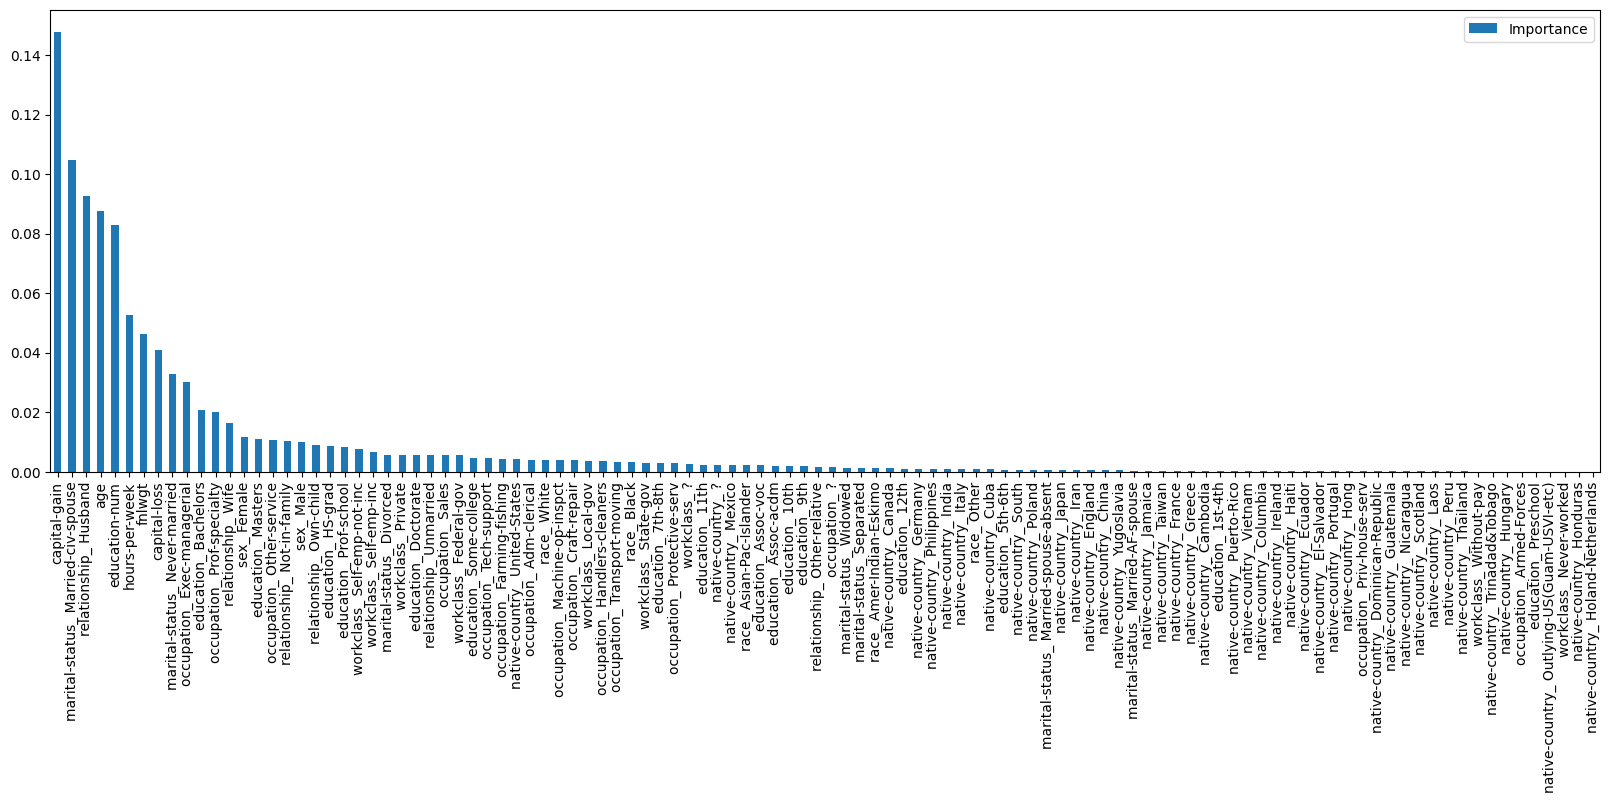

In [38]:
# Mallinnetaan pylväskaavioon
feat_importances = pd.DataFrame(rfc_fit.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(20,6))

In [55]:
# Luodaan testi rivi, jolla testataan mallin ennustetta
columns = X_test.columns
test_dict = dict()

for col in columns:
    if col in {'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt'}:
        test_dict[col] = [0]
        continue

    if col == "native-country_ Vietnam":
        test_dict[col] = [True]
    
    test_dict[col] = [False]

df = pd.DataFrame.from_dict(test_dict)

Y_pred_2 = rfc_fit.predict(df)
Y_pred_2[0]  # Vastaus on <=50K

' <=50K'